In [1]:
#import libarary
import pandas as pd
import numpy as np
import html 
import re
import warnings 
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn_extra.cluster import KMedoids
#Step3 and Step4
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer #for vectorize text into sparse matrix 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from io import StringIO
from sklearn.model_selection import cross_val_score
from IPython.display import display
import itertools

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eBdesk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eBdesk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#load the data
df=pd.read_csv("C:/Users/eBdesk/Desktop/SupervisorConf/media/dataTraining3/1st/final/data.csv")

In [4]:
df

sumber  \
0            media indonesia   
1            media indonesia   
2                     kompas   
3           bisnis indonesia   
4      tribun news palembang   
...                      ...   
10427     tribun news kupang   
10428              suara.com   
10429               tempo.co   
10430         pikiran rakyat   
10431      tribun news batam   

                                                    link           created_at  \
0      https://mediaindonesia.com/ekonomi/370779/asos...  2020-12-02 17:35:48   
1      https://mediaindonesia.com/ekonomi/370781/real...  2020-12-02 17:45:34   
2      https://megapolitan.kompas.com/read/2020/12/08...  2020-12-08 03:40:45   
3      https://market.bisnis.com/read/20201207/192/13...  2020-12-07 00:20:13   
4      https://palembang.tribunnews.com/2020/12/05/us...  2020-12-05 06:17:21   
...                                                  ...                  ...   
10427  https://kupang.tribunnews.com/2020/12/01/rasa-...  2020-12-01 03:37:49   
10428  https://www.suara.com/sport/2020/12/01/080821/...  2020-12-01 01:47:24   
10429  https://sport.tempo.co/read/1410433/fia-dan-fo...  2020-12-01 02:33:28   
10430  https://www.pikiran-rakyat.com/bola/pr-0110395...  2020-12-01 16:43:33   
10431  https://batam.tribunnews.com/2020/12/01/update...  2020-12-01 02:38:22   

                   category                                            content  
0      business and economy  ASOSIASI dan pelaku pasar mendukung penuh kebi...  
1      business and economy  KEMENTERIAN Keuangan mencatat realisasi belanj...  
2      business and economy  Kota Depok Jawa Barat kembali ditetapkan sebag...  
3      business and economy  Sinovac Biotech China mengatakan bahwa mereka ...  
4      business and economy  Ustaz ustazah marbot hingga Ketua RT di Palemb...  
...                     ...                                                ...  
10427                sports  Dua perasaan berbeda dirasakan oleh kiper Pers...  
10428                sports  Petugas medis Formula 1 (F1) mengungkapkan bah...  
10429                sports  Formula 1 memulai penyelidikan atas kecelakaan...  
10430                sports  Liga Primer Inggris 2020-2021 menutup pekan ke...  
10431                sports  Update kabar terbaru Raul Jimenez setelah insi...  

[10432 rows x 5 columns]

In [5]:
katagori = df['category'].value_counts()
katagori

lifestyle                 1072
law and crimes            1071
health and medicine       1051
sports                    1051
entertainment             1047
education                 1045
science and technology    1043
politics and election     1022
business and economy      1017
disaster and accident     1013
Name: category, dtype: int64

In [6]:
nanvaluekategori = df['category'].isnull().sum()
nanvaluecontent = df['content'].isnull().sum()
nanvaluekategori,nanvaluecontent

(0, 0)

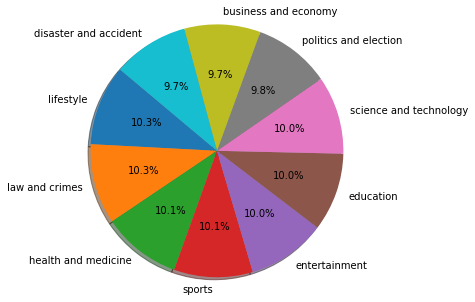

In [7]:
#(menampilkan jumlah data dlm grafik)
plt.figure(figsize=(5,5))
labels = katagori.index.tolist()
sizes = katagori
explode = (0,0,0,0,0,0,0,0,0,0) 
# Plot
plt.pie(sizes, explode=explode, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [8]:
NewsData = df.drop(columns=['sumber', 'link','created_at'])
NewsData

category                                            content
0      business and economy  ASOSIASI dan pelaku pasar mendukung penuh kebi...
1      business and economy  KEMENTERIAN Keuangan mencatat realisasi belanj...
2      business and economy  Kota Depok Jawa Barat kembali ditetapkan sebag...
3      business and economy  Sinovac Biotech China mengatakan bahwa mereka ...
4      business and economy  Ustaz ustazah marbot hingga Ketua RT di Palemb...
...                     ...                                                ...
10427                sports  Dua perasaan berbeda dirasakan oleh kiper Pers...
10428                sports  Petugas medis Formula 1 (F1) mengungkapkan bah...
10429                sports  Formula 1 memulai penyelidikan atas kecelakaan...
10430                sports  Liga Primer Inggris 2020-2021 menutup pekan ke...
10431                sports  Update kabar terbaru Raul Jimenez setelah insi...

[10432 rows x 2 columns]

In [9]:
NewsData['content'] = NewsData['content'].str.lower()
NewsData

category                                            content
0      business and economy  asosiasi dan pelaku pasar mendukung penuh kebi...
1      business and economy  kementerian keuangan mencatat realisasi belanj...
2      business and economy  kota depok jawa barat kembali ditetapkan sebag...
3      business and economy  sinovac biotech china mengatakan bahwa mereka ...
4      business and economy  ustaz ustazah marbot hingga ketua rt di palemb...
...                     ...                                                ...
10427                sports  dua perasaan berbeda dirasakan oleh kiper pers...
10428                sports  petugas medis formula 1 (f1) mengungkapkan bah...
10429                sports  formula 1 memulai penyelidikan atas kecelakaan...
10430                sports  liga primer inggris 2020-2021 menutup pekan ke...
10431                sports  update kabar terbaru raul jimenez setelah insi...

[10432 rows x 2 columns]

In [10]:
# untuk menghapus apapun selain text 
NewsData['content']=NewsData['content'].str.replace("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([0-9])","")
#step tokenize
NewsData['content'] = NewsData['content'].apply(nltk.word_tokenize)
NewsData

category                                            content
0      business and economy  [asosiasi, dan, pelaku, pasar, mendukung, penu...
1      business and economy  [kementerian, keuangan, mencatat, realisasi, b...
2      business and economy  [kota, depok, jawa, barat, kembali, ditetapkan...
3      business and economy  [sinovac, biotech, china, mengatakan, bahwa, m...
4      business and economy  [ustaz, ustazah, marbot, hingga, ketua, rt, di...
...                     ...                                                ...
10427                sports  [dua, perasaan, berbeda, dirasakan, oleh, kipe...
10428                sports  [petugas, medis, formula, f, mengungkapkan, ba...
10429                sports  [formula, memulai, penyelidikan, atas, kecelak...
10430                sports  [liga, primer, inggris, menutup, pekan, ke, de...
10431                sports  [update, kabar, terbaru, raul, jimenez, setela...

[10432 rows x 2 columns]

In [11]:
data = pd.read_csv("C:\\Users\\eBdesk\\Documents\\Untitled Folder\\indonesian_stopword.txt")
data['\'\'']
NewsData['content'] = NewsData['content'].apply(lambda x: [y for y in x if y not in data['\'\''].tolist()])
stopword = NewsData
stopword

category                                            content
0      business and economy  [asosiasi, pelaku, pasar, mendukung, penuh, ke...
1      business and economy  [kementerian, keuangan, mencatat, realisasi, b...
2      business and economy  [kota, depok, jawa, ditetapkan, zona, merah, w...
3      business and economy  [sinovac, biotech, china, dana, us, pengembang...
4      business and economy  [ustaz, ustazah, marbot, ketua, rt, palembang,...
...                     ...                                                ...
10427                sports  [perasaan, berbeda, dirasakan, kiper, persib, ...
10428                sports  [petugas, medis, formula, f, pembalap, tim, ha...
10429                sports  [formula, penyelidikan, kecelakaan, mengerikan...
10430                sports  [liga, primer, inggris, menutup, pekan, pertan...
10431                sports  [update, kabar, terbaru, raul, jimenez, inside...

[10432 rows x 2 columns]

In [12]:
#untuk mengubah field sentimen menjadi angka untuk mempercepat proses
NewsData2 = sorted(NewsData['category'].unique())
NewsData_mapping = dict(zip(NewsData2, range(0, len(NewsData2) + 1)))
NewsData['category']  = NewsData['category'].map(NewsData_mapping).astype(int)
NewsData_mapping = NewsData
NewsData_mapping

category                                            content
0             0  [asosiasi, pelaku, pasar, mendukung, penuh, ke...
1             0  [kementerian, keuangan, mencatat, realisasi, b...
2             0  [kota, depok, jawa, ditetapkan, zona, merah, w...
3             0  [sinovac, biotech, china, dana, us, pengembang...
4             0  [ustaz, ustazah, marbot, ketua, rt, palembang,...
...         ...                                                ...
10427         9  [perasaan, berbeda, dirasakan, kiper, persib, ...
10428         9  [petugas, medis, formula, f, pembalap, tim, ha...
10429         9  [formula, penyelidikan, kecelakaan, mengerikan...
10430         9  [liga, primer, inggris, menutup, pekan, pertan...
10431         9  [update, kabar, terbaru, raul, jimenez, inside...

[10432 rows x 2 columns]

In [13]:
NewsData2

['business and economy',
 'disaster and accident',
 'education',
 'entertainment',
 'health and medicine',
 'law and crimes',
 'lifestyle',
 'politics and election',
 'science and technology',
 'sports']

In [14]:
NewsData['content'] = NewsData['content'].str.join(" ")
NewsData.head()

category                                            content
0         0  asosiasi pelaku pasar mendukung penuh kebijaka...
1         0  kementerian keuangan mencatat realisasi belanj...
2         0  kota depok jawa ditetapkan zona merah wilayah ...
3         0  sinovac biotech china dana us pengembangan vak...
4         0  ustaz ustazah marbot ketua rt palembang meneri...

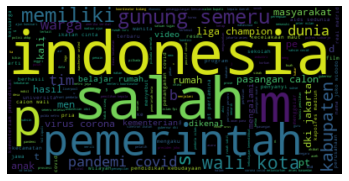

In [15]:
#wordcloud untuk mengetahui text apa saja yang sering keluar
text = NewsData['content'].to_string()
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
import array
for index,row in NewsData.iterrows():
  print(row['content'])

asosiasi pelaku pasar mendukung penuh kebijakan pemerintah menjual produk vape konsumen berusia mengandung menyusui diatur mengatur pemerintah produk vape diperuntukkan perokok konvensional mengurangi kebiasaan merokoknya mengurangi risiko kesehatannya ketua asosiasi vaper indonesia apvi aryo andriyanto keterangan resmi aryo berbisnis industri fokus tanggung sosial rokok elektrik salah satunya berkomitmen mencegah penggunaan rokok elektrik anak umur merokok vape senada sekjen aliansi pengusaha penghantar nikotin elektronik indonesia appnindo roy lefrans wungow roy mendorong industri promosi konsumen berusia mencegah pemakaian perokok penerapan pengaturan batasan usia pengguna produk vape mutlak batasan produk perokok dewasa pelaku industri bertanggung batasan akses vape anakanak industri produk vape peraturan bijak kelak mengatur produk konsumen disiplin bayar cukai sesuai ditentukan komitmen mencegah produk vape diakses berusia perokok roy berharap pemerintah melibatkan asosiasi menge

kementerian riset teknologi kemristek anggaran enam tim pengembangan vaksin merah putih penanganan covid anggaran membiayai riset bibit vaksin laboratorium uji praklinis hewan uji klinis tahap manusia tim riset vaksin suntikan dana lembaga ilmu pengetahuan indonesia lipi universitas indonesia ui lembaga biologi molekuler eijkman universitas airlangga sisanya tim universitas gadjah mada institut teknologi bandung menteri riset teknologi bambang brodjonegoro enam tim riset vaksin covid memiliki platform metode riset berbedabeda menemukan bibit vaksin covid enam tim harapkan lahir vaksin covid vaksin merah putih intinya bibit vaksin dikembangkan virus bertransmisi indonesia konferensi pers virtual meninjau lab lipi cibinong bogor pengembangan vaksin didorong dihilirisasi diproduksi perusahaan farmasi indonesia rangka mencapai kekebalan komunitas menristek menyebut kerja vaksin strategi jangka pendek menengah vaksin merah putih jangka menengah vaksin covid daya tahan ditimbulkan vaksin ber

menteri badan usaha milik negara bumn erick thohir kementerian bumn berkomitmen membuka pasar luas menerapkan sistem pasar digital umkm digital platform memperkuat umkm bumn unit umkm indonesia perkembangan digital dipungkiri umkm tulang punggung berkontribusi pertumbuhan ekonomi indonesia negaranegara pandemi covid dampak pertumbuhan ekonomi indonesia laju ekonomi kuartal ketiga mengalami kontraksi minus yoy terpuruknya perekonomian dampak aktivitas umkm mayoritas pendapatan usahanya berbasis harian konsisten menyerah momentum krisis manfaatkan peluang lompatan berinovasi strategi umkm tangguh pasar global erick brilian preneur umkm export menurutnya indonesia tujuan pasar pelaku ekonomi negara pemerintah bumn dukungan umkm iklim usaha sehat ketersediaan peluang pasar kebijakan mendukung dunia usaha menjalankan bisnis kondisi diharapkan bergabungnya umkm ekosistem pelaku usaha memperluas jaringan umkm online meningkatkan transaksi penjualan memiliki pengalaman memasuki dunia transaksi

api dikabarkan muncul stasiun pengisian bahan bakar spbu kawasan jalan mt haryono tebet jakarta bekas api salah atap pom bensin pantauan detikcom api dikabarkan muncul spbu jalan mt haryono tebet jakarta lokasi spbu berdekatan halte tebet bumd api bekas hangus atap pom bensin garis polisi terpasang menutupi akses pom bensin polisi berjaga lokasi mobil damkar merapat lokasi belasan petugas pemadam masuk memeriksa pom bensin petugas spbu pembatas spanduk lintas jalan mt haryono cawang terpantau ramailancar polisi mengntur lintas penjelasan pertamina
mobil menyeberangi lintasan kereta palang pintu kota probolinggo dihantam kereta api petang korban selamat kendaraan terseret gerbong meter mobil sedan ditabrak kereta api sri tanjung jurusan jogjakarta banyuwangi kecelakaan korban rumah saudaranya sisi rel kereta api melintas mobil korban ditabrak kereta api mobil terseret meter terhenti tepi rel korban kritis dievakuasi dibawa rumah sakit dokter mohamad saleh kota probolinggo korban mengala

hujan intensitas kota batu mengakibatkan bencana alam laporan resmi korban jiwa laporan tanah longsor skala salah satunya rt rw kelurahan temas kota batu plengsengan kawasan ambles pasca hujan reda amblesnya plengsengan merembet bahu jalan kerusakannya memiliki dimensi meter lebar meter meter keretakan plengsengan meter wakil wali kota batu punjul santoso turun langsung lokasi meninjau kondisi ditemani petugas bpbd dinas pupr muspika kota batu plengsengan ambles tergerus aliran air ditinjau instansi terkait bertindak perbaikan punjul santoso dinas teknis pengukuran objek perbaikan kebutuhan material perbaikan plengsengan belanja terduga btt peristiwa alam dikategorikan dampak bencana bersamaan pembenahan plengsengan ambrol ditindaklanjuti pembangunan jalan torongrejo lokasi plengsengan ambles berdempetan wilayah desa torongrejo pembangunan jalan temastorongrejo dimanfaatkan jalan tembus punjul santoso surat pengajuan rt kelurahan terkait permohonan perbaikan plengsengan pembangunan jal

operasional maskapai penerbangan berjalan lancar aman berlangsungnya luncuran awan panas guguran gunungapi semeru corporate communication strategic lion air group danang mandala prihantoro pengumuman resmi otoritas bandar udara notam mempengaruhi perubahan jadwal pergerakan pesawat lion group penerbangan wilayah aman terkendali maskapai swasta reschedule reroute mengambil keputusan operasional sesuai pengumuman notice of air man notam rekomendasi indikasi gangguan tindak kondisi berbeda diambil lion group penerbangan perdana wings air dijadwalkan kupang lewoleba penjadwalan ulang keberangkatan reschedule pengembalian dana refund sesuai aturan berlaku akibat erupsi gunung ile lewotolok berdasarkan pengumuman resmi otoritas bandar udara notam operasional bandar udara wonopito lewoleba pulau lembata kecamatan nubatukan kabupaten lembata nusa tenggara lwe ditutup indonesia sesuai operasional bandar udara penutupan bandar udara dampak erupsi aktivitas gunung ile lewotolok informasi material

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




dprd kabupaten semarang menilai langkah penutupan objek wisata dusun semilir kecamatan bawen kabupaten semarang satgas covid pemerintah kabupaten pemkab semarang terlambat ketua dprd kabupaten semarang bondan marutohening semestinya satgas covid kabupaten semarang pemkab mengambil tindakan penutupan saran solutif terlambat mustinya tindakan disertai saran solutif pengelola wisata pembatasan jam operasional pengunjung masuk terangnya dihubungi tribunjatengcom bondan destinasi wisata bumi serasi objek wisata dusun semilir dinilai berkumpulnya ditengah kenaikan warga terpapar virus corona covid satgas covid memperbanyak edukasi batasan kedepan berharap satgas covid meningkatkan frekuensi edukasi mengedepankan tindakan pelanggar protokol kesehatan diberitakan pemkab semarang menutup operasional obyek wisata dusun semilir kecamatan bawen kabupaten semarang batas ditentukan satgas covid plt sekda kabupaten semarang valeanto soekendro penutupan rangka evaluasi penerapan protokol kesehatan vi

menekan angka kejahatan kota palembang satuan reskrim polrestabes palembang unit pidum pidana ranmor tekab mainmain tindak pelaku kejahatan c curas curat curanmor terbukti pekan jalanan c gerah warga palembang berhasil ditangkap petugas ditempat terpisah tersangka diamankan enam tindakan terukur tersangka dibawah umur barang bukti mengantarkan tersangka jeruji besi sel tahanan polrestabes palembang siang tersangka tangkapan anggota sepekan tersangka residivis tersangka masuk daftar pencarian dpo kembangkan kasusnya kasat reskrim polrestabes palembang kompol edi rahmat dampingi kanit pidum akp robert perdamaian sihombing kanit ranmor iptu novel kurniawan mengelar perkara
tujuh terduga teroris ditangkap densus rampok anggota dprd gorontalo menyerang polsek tim detasemen khusus densus antiteror polri menangkap tujuh terduga teroris gorontalo kelompok jaringan daulah islamiyah karo penmas humas polri brigjen awi setyono tergabung grup media sosial medsos diduga berencana aksi terorisme pol

ririn ekawati merayakan ulang bahagianya ririn kejutan acara perayaan ulang keluarga sang kekasih ibnu jamil acara ririn tampil santun memakai dress bermotif usut usut dress ririn keluaran dior harganya mencapai detil merek harga dress ririn diungkap akun instagram selebrit warganet langsung heboh kakak rini yulianti memakai dress harganya fantastis lu gak typo min pas ngetik harganya emoji celetuk warganet percaya dress ririn harganya mencapai ratusan ngadingadi dior ngasih harganya baju seharga mobil emoji menangis warganet kirain ribu sambung harganya harga rumah astajim terhura ririn satusatunya selebriti tanah air kerap kedapatan memakai barang fashion harga fantastis nagita slavina luna maya namanama selebriti dituntut tampil menarik publik heran memiliki koleksi barang mahal dipakai menunjang penampilan public figure
barubaru publik dihebohkan kemunculan disebutsebut presenter irfan hakim video diunggah akun instagram informasi video pria sosok pria istirahat sehabis berolahraga

indonesia menyukai renyahnya lele ikan air tawar populer kalangan lele dikenal salah jenis ikan kaya nutrisi nikmat mudah diolah penggemar lele bosan olahan begitubegitu coba resep yuk namanya lele popcorn crispy teksturnya garing lembut bikin nagih gurih disukai eleh anggota keluarga resep lele popcorn cripsy coba dikutip cookpad kiriman nhncook hikmah cilacap bahan gr ikan lele fillet sdm cabe bubuk siung bawang putih haluskan sdt garam sdm mayonais optional bahan balutan gr tepung terigu sdm tepung maizena sdt kaldu bubuk sdt lada bubuk sdt garam sdt soda kue wajib bahan membasahi adonan liter air sdm susu bubuk cuci bersih ikan lele fillet cuci bersih tambahkan bawang putih cabe bubuk garam mayonais aduk diamkan menit marinasi menunggu lele dimarinasi siapkan adonan tepung masukan wadah tepung terigu maizena garam kaldu bubuk lada bubuk soda kue aduk siapkan air wadah masukan sdm susu bubuk sisihkan menit masukan lele dimarinasi tepung aduk ditekan ya tangan jari melebar terbalut t

menjelang pilkada calon wali kota cawali surabaya nomor urut eri cahyadi mengikuti acara istigasah kubro nahdliyin surabaya digelar virtual kompleks pondok pesantren at tauhid sidosermo surabaya istighosah dihadiri kiai ulama sepuh surabaya kh mas mansur muhajir kh mas faqihudin muhajir kh imam syafii prof kh ghozali said kh abdullah qosim kh kemas abdurrahman kh abdullah tawab kh ishaq ra fathurrozi menghadiri membaca istighosah kubro kesembilan kiai ulama sepuh memanjatkan doa bergantian memohon allah swt eri cahyadi penerus estafet kepemimpinan wali kota surabaya tri rismaharini melantunkan sholawat pembacaan istighosah kubro acara diisi tausyiah ulama nu kh ahmad muwafiq dikenal nama gus muwafiq kesempatan gus muwafiq mendoakan eri cahyadi wali kota surabaya percaya warga nu surabaya memilih suaranya eri cahyadi surabaya dipimpin wali kota semoga doa dikabulkan allah swt aamiin gus muwafiq eri cahyadi sambutan maju wali kota surabaya membahagiakan masyarakat terpilih wali kota sura

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [17]:
stm_tfidf = NewsData
NewsData

category                                            content
0             0  asosiasi pelaku pasar mendukung penuh kebijaka...
1             0  kementerian keuangan mencatat realisasi belanj...
2             0  kota depok jawa ditetapkan zona merah wilayah ...
3             0  sinovac biotech china dana us pengembangan vak...
4             0  ustaz ustazah marbot ketua rt palembang meneri...
...         ...                                                ...
10427         9  perasaan berbeda dirasakan kiper persib bandun...
10428         9  petugas medis formula f pembalap tim haas roma...
10429         9  formula penyelidikan kecelakaan mengerikan dia...
10430         9  liga primer inggris menutup pekan pertandingan...
10431         9  update kabar terbaru raul jimenez insiden bent...

[10432 rows x 2 columns]

In [18]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def tokenize(text):
    return [stemmer.stem(text)]
#tfidf untuk no stemming
#tfidf_wm = tfidfvectorizer.fit_transform(NewsData['content'])
vectorizer2 = TfidfVectorizer(stop_words = None, tokenizer = None)
tfidf_wm = vectorizer2.fit_transform(NewsData['content'])
word_features2 = vectorizer2.get_feature_names()
print(len(word_features2))
print(word_features2[:50]) 

75414
['aa', 'aaa', 'aaaa', 'aaal', 'aaangurah', 'aac', 'aad', 'aadhaar', 'aaf', 'aafiyah', 'aafsalahudin', 'aag', 'aagwa', 'aah', 'aaji', 'aakn', 'aakrab', 'aal', 'aalfieri', 'aali', 'aaliya', 'aaliyaah', 'aaliyah', 'aam', 'aamiin', 'aamin', 'aamir', 'aan', 'aap', 'aar', 'aaron', 'aarp', 'aars', 'aas', 'aasia', 'aau', 'aaui', 'aayiram', 'ab', 'abaaba', 'abab', 'ababa', 'ababel', 'ababil', 'abacus', 'abad', 'abadi', 'abadikan', 'abadinya', 'abah']


In [19]:
df1 = pd.DataFrame(tfidf_wm.toarray(), columns=vectorizer2.get_feature_names())
df1

aa  aaa  aaaa  aaal  aaangurah  aac  aad  aadhaar  aaf  aafiyah  ...  \
0      0.0  0.0   0.0   0.0        0.0  0.0  0.0      0.0  0.0      0.0  ...   
1      0.0  0.0   0.0   0.0        0.0  0.0  0.0      0.0  0.0      0.0  ...   
2      0.0  0.0   0.0   0.0        0.0  0.0  0.0      0.0  0.0      0.0  ...   
3      0.0  0.0   0.0   0.0        0.0  0.0  0.0      0.0  0.0      0.0  ...   
4      0.0  0.0   0.0   0.0        0.0  0.0  0.0      0.0  0.0      0.0  ...   
...    ...  ...   ...   ...        ...  ...  ...      ...  ...      ...  ...   
10427  0.0  0.0   0.0   0.0        0.0  0.0  0.0      0.0  0.0      0.0  ...   
10428  0.0  0.0   0.0   0.0        0.0  0.0  0.0      0.0  0.0      0.0  ...   
10429  0.0  0.0   0.0   0.0        0.0  0.0  0.0      0.0  0.0      0.0  ...   
10430  0.0  0.0   0.0   0.0        0.0  0.0  0.0      0.0  0.0      0.0  ...   
10431  0.0  0.0   0.0   0.0        0.0  0.0  0.0      0.0  0.0      0.0  ...   

       zuremi  zurich  zus  zuur  zvezda   zw  zwirner   zy  zydus  zzooming  
0         0.0     0.0  0.0   0.0     0.0  0.0      0.0  0.0    0.0       0.0  
1         0.0     0.0  0.0   0.0     0.0  0.0      0.0  0.0    0.0       0.0  
2         0.0     0.0  0.0   0.0     0.0  0.0      0.0  0.0    0.0       0.0  
3         0.0     0.0  0.0   0.0     0.0  0.0      0.0  0.0    0.0       0.0  
4         0.0     0.0  0.0   0.0     0.0  0.0      0.0  0.0    0.0       0.0  
...       ...     ...  ...   ...     ...  ...      ...  ...    ...       ...  
10427     0.0     0.0  0.0   0.0     0.0  0.0      0.0  0.0    0.0       0.0  
10428     0.0     0.0  0.0   0.0     0.0  0.0      0.0  0.0    0.0       0.0  
10429     0.0     0.0  0.0   0.0     0.0  0.0      0.0  0.0    0.0       0.0  
10430     0.0     0.0  0.0   0.0     0.0  0.0      0.0  0.0    0.0       0.0  
10431     0.0     0.0  0.0   0.0     0.0  0.0      0.0  0.0    0.0       0.0  

[10432 rows x 75414 columns]

In [20]:
tfidf_wm

<10432x75414 sparse matrix of type '<class 'numpy.float64'>'
	with 1123630 stored elements in Compressed Sparse Row format>

In [21]:
X = df1
y = stm_tfidf['category']
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 random_state = 20,
                                                 test_size = 0.3)

In [22]:
print('The length of the trainning set are {}'.format(len(X_train)))
print('The length of the test set are {}'.format(len(X_test)))

The length of the trainning set are 7302
The length of the test set are 3130


In [23]:
kmedoids = KMedoids(n_clusters=10, random_state=1000).fit(X_train)

In [24]:
kmedoids.labels_
common_words = kmedoids.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(word_features2[word] for word in centroid))

0 : guguran, lumajang, gunung, awan, semeru, panas, bpbd, kawah, desa, kabupaten, puncak, erupsi, vulkanik, jongring, darurat, seloko, kelabu, kubah, sektor, sumberwuluh, teramati, lereng, luncur, supiturang, candipuro
1 : siswa, jateng, covid, smk, positif, jawa, sembuh, kesehatan, penularan, semarang, protokol, sekolah, yulianto, abai, seruan, mui, terpapar, negatif, otg, pemeriksaan, berdasarkan, terjangkit, pasien, dinas, edukasi
2 : gunung, semeru, awan, panas, warga, mengungsi, kaki, letusan, guguran, ombo, orooro, hujan, kecamatan, lumajang, aman, desa, suara, aisyah, candipuro, iwan, pronojiwo, meletus, terpantau, lava, erupsi
3 : anak, sekolah, idai, kebiasaan, tatap, muka, covid, risiko, penularan, tangan, kegiatan, belajar, masker, kesehatan, pembukaan, protokol, konfirmasi, indonesia, memakai, standar, pengenalan, jarak, cuci, bergejala, negara
4 : covid, pasien, penambahan, sembuh, aktif, positif, angka, dinyatakan, indonesia, data, spesimen, kematian, mencatat, tercatat, 

In [25]:
kmedoids.labels_

array([3, 1, 1, ..., 8, 5, 4], dtype=int64)

In [26]:
kmedoids.inertia_

9827.377876738177

In [27]:
def unique(list1):
 
    # intilize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
        print (x)

In [28]:
unique(kmedoids.labels_)

3
1
9
8
6
2
5
7
0
4


In [29]:
kmedoids.cluster_centers_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
y_pred1 = kmedoids.predict(X_test)

In [31]:
unique(y_pred1)

8
1
2
3
4
5
7
9
6
0


In [32]:
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    print(contingency_matrix)
    print(np.sum(contingency_matrix))
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [33]:
purity_score(y_test,y_pred1)

[[ 20  25   8  49  85  50   8   3  34  15]
 [ 73  10 137  11   6   5  10  48   1   8]
 [  2 102   1 158  16  26   2   0   7  15]
 [  6  25  11 124  23  33  14   1   9  73]
 [  6  28   6 109  52  34   2   5  68   1]
 [ 17  27  20  42  22  30  90  29  16   7]
 [ 45  22  36 131  23  34   3   0  13  17]
 [  4  28   1  10  22  98  11   1  10 142]
 [ 15  26  25  75  61  25   5   8  37  17]
 [ 19  16  19  54  58  52   4   4  23  71]]
3130


0.3198083067092652

In [36]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(X_test, y_pred1)
print(silhouette_avg)

0.0023566908063484136


In [37]:
sample_silhouette_values = silhouette_samples(X_test, y_pred1)
for i in range(10):
    ith_cluster_silhouette_values = sample_silhouette_values[y_pred1 == i]
    print(np.mean(ith_cluster_silhouette_values))

-0.00012890972828440858
-0.0002725372327598901
0.0019920492094933017
-0.0011657401403334562
-0.0014740937943291301
-0.001959196773532421
0.017509756192264785
0.03898906377402764
0.0040246552072879084
0.004932593236397878


In [38]:
sw = []
purity = []
from tqdm.notebook import tqdm as tqdm
import pickle
for i in tqdm(range(2, 11)):
    kmedoids = KMedoids(n_clusters = i, random_state = 0)
    kmedoids.fit(X_train)
    filename = 'C:\\Users\\eBdesk\\Documents\\Untitled Folder\\10k-with out stemming II\\10kdata-cluster-'+str(i)+'.sav'
    pickle.dump(kmedoids, open(filename, 'wb'))
    y_pred1 = kmedoids.fit_predict(X_test)
    silhouette_avg = silhouette_score(X_test, y_pred1)
    purity.append(purity_score(y_test,y_pred1))
    sw.append(silhouette_avg)

[[251  46]
 [289  20]
 [279  50]
 [247  72]
 [259  52]
 [268  32]
 [176 148]
 [263  64]
 [225  69]
 [257  63]]
3130
[[231  43  23]
 [220  10  79]
 [ 81  37 211]
 [203  58  58]
 [212  47  52]
 [208  22  70]
 [129 114  81]
 [197  46  84]
 [163  60  71]
 [149  26 145]]
3130
[[220  44  20  13]
 [207  17  73  12]
 [ 79  28 199  23]
 [188  38  50  43]
 [130  32  33 116]
 [162  23  51  64]
 [123  57  77  67]
 [141  63  72  51]
 [147  45  61  41]
 [136  25 126  33]]
3130
[[205  40  14  11  27]
 [159  12  54  11  73]
 [ 72  28 189  19  21]
 [134  27  31  30  97]
 [ 93  29  14  74 101]
 [123  19  28  45  85]
 [104  52  65  53  50]
 [ 79  46  36  35 131]
 [122  38  46  25  63]
 [112  18  88  21  81]]
3130
[[ 21 196  38  10  10  22]
 [ 68 124  11   9  46  51]
 [ 16  69  28  18 186  12]
 [ 93 121  24  29  26  26]
 [ 72  77  27  59  12  64]
 [ 68 114  16  39  26  37]
 [ 40  98  52  51  64  19]
 [117  74  41  29  25  41]
 [ 37 107  38  23  44  45]
 [ 75  96  16  17  82  34]]
3130
[[ 18 186  21   9   

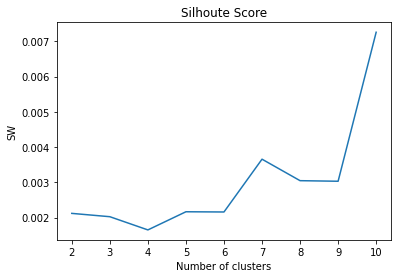

[0.002118826131409884, 0.0020244568345283613, 0.0016497523776466125, 0.0021647736805614406, 0.002158387580466442, 0.003655942328785292, 0.0030465644822394123, 0.0030301782403764723, 0.007256885714311727]


In [40]:
plt.plot(range(2, 11), sw)
plt.title('Silhoute Score')
plt.xlabel('Number of clusters')
plt.ylabel('SW')      #within cluster sum of squares
plt.show()
print(sw)

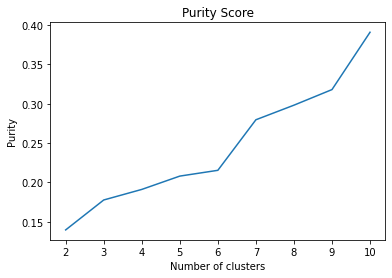

[0.13961661341853035, 0.17763578274760383, 0.19105431309904153, 0.20798722044728435, 0.21533546325878594, 0.2795527156549521, 0.29808306709265175, 0.31789137380191695, 0.39073482428115014]


In [41]:
plt.plot(range(2, 11), purity)
plt.title('Purity Score')
plt.xlabel('Number of clusters')
plt.ylabel('Purity')      #within cluster sum of squares
plt.show()
print(purity)